<a href="https://colab.research.google.com/github/LayasaranP/AI-ML/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Handling Missing Data**

### **Missing Values**
Missing values occurs in dataset when some of the information is not stored for a variable. There are three mechanism:

# **Mechanisms of Missing Data**
here are three mechanisms by which missing values occur:

##**1.Missing Completely at Random (MCAR):**

1.1 The probability of a value being missing is unrelated to both observed and missing data.

1.2 There is no specific reason for the missing data; it may be due to errors from data entry operators or machines.

1.3 The missing values are randomly distributed through the dataset.

##**2.Missing at Random (MAR):**

2.1 The probability of a value being missing depends only on the observed data.

2.2 There is a systematic relationship between the missingness and other observed variables.

2.3 For example, men may not be comfortable disclosing their salary, and women may not be comfortable disclosing their age in a survey.

##**3.Missing Not at Random (MNAR):**

3.1 The probability of a value being missing depends on the value of the missing data itself or on unmeasured factors associated with the missing values.

3.2 For example, employees less satisfied with their jobs may be less likely to report their income.

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


check missing values

In [ ]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Delete a rows or data points to handle missing values



In [ ]:
df.shape

(891, 15)

In [ ]:
#column wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


##**What is Imputation?**

Imputation is the process of filling in missing values in a dataset with substituted values. Instead of discarding rows or columns with missing data, imputation allows us to keep as much information as possible.

##**Why Impute Missing Values?**

1.   Preserve data: Dropping rows/columns can waste valuable information.
2.   Avoid bias: Missing data can distort results if not handled properly.
3.   Enable algorithms: Many machine learning models can’t handle missing values directly.

##**Imputation Missing Values**

###**1. Mean Values Imputation**

<Axes: xlabel='age', ylabel='Count'>

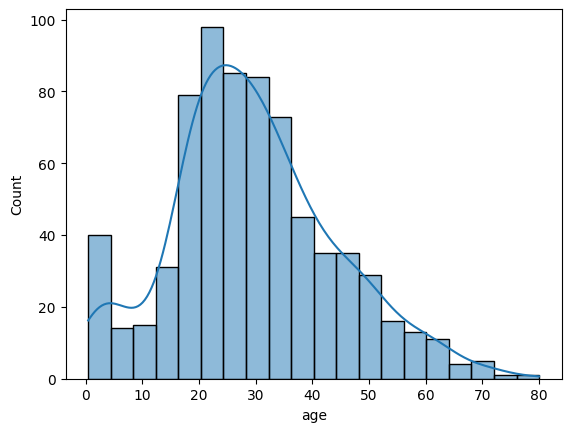

In [ ]:
sns.histplot(df['age'], kde=True)

In [ ]:
df['Age_Mean'] = df['age'].fillna(df['age'].mean())
df[['Age_Mean', 'age']]

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


This method works well with normally distributed data points

###**2. Median Value Imputation** - If we have outliers in the dataset

In [ ]:
df['age_median'] = df['age'].fillna(df['age'].median())
df[['age_median', 'Age_Mean', 'age']]

,age_median,Age_Mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


##**3. Mode Values Imputation** - Categorical Values
Mode imputation is used for categorical variables. For example, the 'embarked' column in the Titanic dataset.

In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(df['embarked'].isnull().sum())

2


In [ ]:
mode_value = df['embarked'].mode()[0]
df['embarked_mode'] = df['embarked'].fillna(mode_value)
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [ ]:
print(df['embarked_mode'].isnull().sum())
print(df['embarked'].isnull().sum())

0
2


#**2. Handling Imbalanced Dataset**

##What is an Imbalanced Dataset?
Consider a classification problem where the output is categorical. For example, in a binary classification problem, the output can be one of two categories.

Suppose we have 1000 data points, with the output being either "yes" or "no". If 900 data points are "yes" and 100 are "no", this represents a 9:1 ratio. This situation is called an imbalanced dataset because one class significantly outnumbers the other.

##Problems Caused by Imbalanced Datasets:
When training a machine learning model on an imbalanced dataset, the model tends to be biased towards the majority class. This bias can reduce the model's ability to correctly predict the minority class, which is often the class of interest. Therefore, it is necessary to address the imbalance to improve model performance.

##Techniques to Handle Imbalanced Datasets


##Two common techniques to handle imbalanced datasets are:

1.   Upsampling: Increasing the number of data points in the minority class.
2.   Downsampling: Reducing the number of data points in the majority class.
We will first perform upsampling and then downsampling to understand both approaches.

#Upsampling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(123)

##Create a two dataframe
n_samples = 1000
class_0_ratio = 0.9

n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = 100

In [ ]:
n_class_0, n_class_1

(900, 100)

In [ ]:
##Creating DataFrame with Imbalanced Dataset

class_1 = pd.DataFrame({
    "Feature_1": np.random.normal(loc=0, scale=1, size=n_class_0),
    "Feature_2": np.random.normal(loc=0, scale=1, size=n_class_0),
    "Target": [0]*n_class_0
})

class_2 = pd.DataFrame({
    "Feature_1": np.random.normal(loc=2, scale=1, size=n_class_1),
    "Feature_2": np.random.normal(loc=2, scale=1, size=n_class_1),
    "Target": [1]*n_class_1
})

In [ ]:
df = pd.concat([class_1, class_2], ignore_index=True)
df.tail()

,Feature_1,Feature_2,Target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [ ]:
print(df['Target'].value_counts())

Target
0    900
1    100
Name: count, dtype: int64


In [ ]:
df_minority = df[df['Target'] == 1]
df_majority = df[df['Target'] == 0]

df_minority.shape

(100, 3)

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority), random_state=42)

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_minority_upsampled.head()

,Feature_1,Feature_2,Target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['Target'].value_counts()

,count
Target,
0,900
1,900


#Downsampling

In [ ]:
np.random.seed(123)

##Create a two dataframe
n_samples = 1000
class_0_ratio = 0.9

n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = 100

##Creating DataFrame with Imbalanced Dataset

class_1 = pd.DataFrame({
    "Feature_1": np.random.normal(loc=0, scale=1, size=n_class_0),
    "Feature_2": np.random.normal(loc=0, scale=1, size=n_class_0),
    "Target": [0]*n_class_0
})

class_2 = pd.DataFrame({
    "Feature_1": np.random.normal(loc=2, scale=1, size=n_class_1),
    "Feature_2": np.random.normal(loc=2, scale=1, size=n_class_1),
    "Target": [1]*n_class_1
})

df = pd.concat([class_1, class_2], ignore_index=True)

print(df['Target'].value_counts())

Target
0    900
1    100
Name: count, dtype: int64


In [ ]:
df_minority = df[df['Target'] == 1]
df_majority = df[df['Target'] == 0]

In [ ]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority,n_samples=len(df_minority), random_state=42)
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled['Target'].value_counts()

,count
Target,
1,100
0,100


#**SMOTE(Synthetic Minority Oversampling Technique)**

##What is SMOTE?
SMOTE stands for Synthetic Minority Oversampling Technique. It is a method used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE generates synthetic instances of the minority class by interpolating between existing minority class instances.

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=12)

In [ ]:
import pandas as pd

df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [ ]:
final_df['target'].value_counts()

,count
target,
0,900
1,100


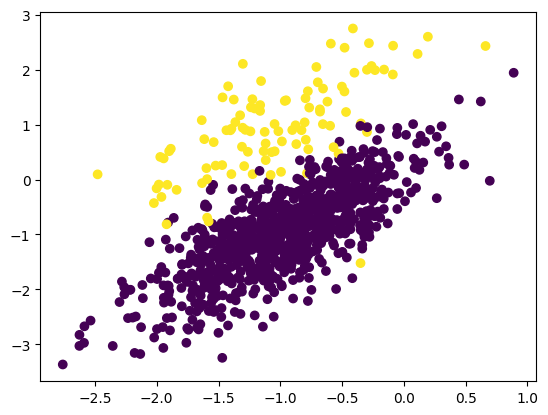

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()

x,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])
x.shape, y.shape

((1800, 2), (1800,))

In [ ]:
len(y[y==0]), len(y[y==1])

(900, 900)

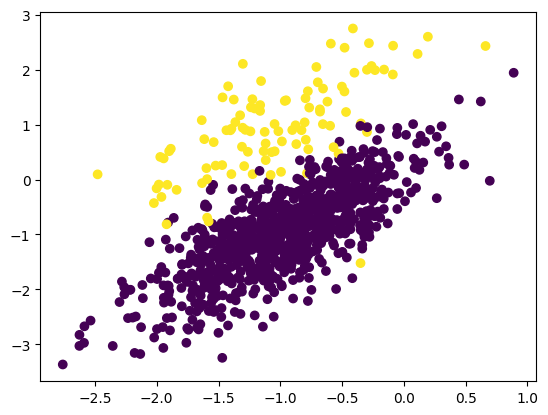

In [ ]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

#**3. Handling Outliers**

In [ ]:
import numpy as np

In [ ]:
# 5 number summary and Box plot

lst = [2, 34, 56, 32, 78, 23, 56, 68, 98, 45]
min, max, Q1, Q3, median = np.quantile(lst, [0, 0.5, 0.25, 0.75, 1.0])
print(Q1, Q3, median, min, max)

32.5 65.0 98.0 2.0 50.5


In [ ]:
IQR = Q3 - Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
print(lower_fence, upper_fence)

-27.0 133.0


<Axes: >

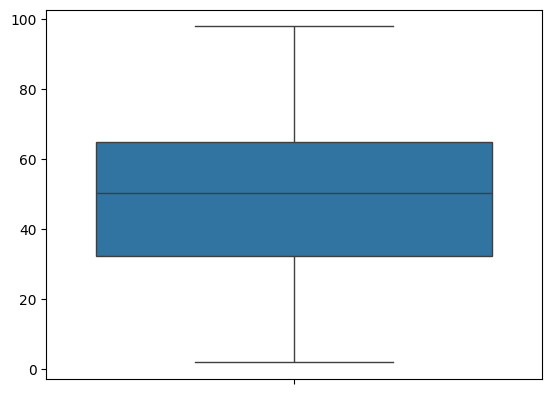

In [ ]:
import seaborn as sns

sns.boxplot(lst)

#**4. Data Encoding - Nominal or One Hot Encoding**

##**What is Data Encoding?**

Data encoding is the process of converting categorical features into numerical values so that models can understand and process them effectively. This is essential for tasks such as predicting salary based on categorical features like degree.

##**Why Data Encoding is Necessary?**

Consider a dataset with features such as years of experience and degree, where the goal is to predict salary based on these features. The degree feature may have various categories like Bachelors, Masters, and PhD. These are categorical variables.

Machine learning models cannot directly interpret categorical variables because they operate on numerical data. While humans understand the meaning of "Bachelors" or "PhD," models require numerical representations. Therefore, we need to convert categorical features into meaningful numerical values. This process is called data encoding.

##**Types of Data Encoding**

###There are several techniques for data encoding:
1.   Nominal or One Hot Encoding
2.   Label or Ordinal Encoding
3.   Target Guided Ordinal Encoding





## **4.1 Nominal or One Hot Encoding**

Consider a categorical feature called "color" with values such as red, green, and blue. This feature is categorical because it consists of distinct categories.

To enable the model to understand this feature, one hot encoding converts it into numerical features by creating new binary features for each category. For example, the categories red, green, and blue become three new features: red, green, and blue.

For each data point, the feature corresponding to its category is set to 1, and the others are set to 0. For instance, if the color is red, the red feature is 1, and green and blue are 0.

###**Disadvantages of One Hot Encoding**

If a categorical feature has many categories, such as 100, one hot encoding will create 100 new features, increasing dimensionality.
This leads to sparse matrices, where most values are zeros and only one value is one per row.
Sparse matrices can cause overfitting, where the model fits the training data too well but performs poorly on new data.
Therefore, one hot encoding is not recommended for features with many categories.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# create a simple dataframe
# create a simple dataframe

df = pd.DataFrame({
    "colors": ["red", "blue", "green", "green", "red", "blue"]
})

df
df = pd.DataFrame({
    "colors": ["red", "blue", "green", "green", "red", "blue"]
})

df

,colors
0,red
1,blue
2,green
3,green
4,red
5,blue


In [ ]:
## create an instance of onehotencoder

OHE = OneHotEncoder()
encoded = OHE.fit_transform(df[['colors']]).toarray()

In [ ]:
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out())
encoded_df

,colors_blue,colors_green,colors_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [ ]:
final_df = pd.concat([df, encoded_df], axis=1)
final_df

,colors,colors_blue,colors_green,colors_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


##**4.2 Label And Ordinal Encoding**

###**What is Label encoding and ordinal encoding?**

Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data. Label encoding involves assigning a unique numerical label to each category in the variable.

For example, if you have three categories like red, green, and blue, you will assign labels like one, two, and three. Each category receives a unique numerical value.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a simple dataframe

df = pd.DataFrame({
    "color": ["red", "blue", "green", "red", "blue", "green"]
})

df

,color
0,red
1,blue
2,green
3,red
4,blue
5,green


In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(df[['color']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 2, 0, 1])

In [ ]:
label_encoder.transform(['red'])

array([2])

###**Limitations of Label Encoding:**

One problem with label encoding is that the model may interpret the numerical labels as having an order or ranking. For example, if red is assigned two, green is one, and blue is zero, the model may think red is greater than green and blue, which is not true for nominal data.

##Ordinal Encoding

If you have a use case where you need to assign ranks to categories, you can use ordinal encoding. Ordinal encoding is used to encode categorical data that have an intrinsic order or ranking. Each category is assigned a numerical value based on its position in the order.

For example, if you have a categorical variable 'education level' with values like high school, college, graduate, and post graduate, you can represent it using ordinal encoding. High school can be rank one, college two, graduate three, and post graduate four.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Create a simple dataframe

df = pd.DataFrame({
    "size": ["small", "medium", "large", "small", "large", "medium"]
})

df

,size
0,small
1,medium
2,large
3,small
4,large
5,medium


In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])
encoded = ordinal_encoder.fit_transform(df[['size']])
encoded

array([[0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.]])

In [ ]:
encoded_df = pd.DataFrame(encoded)
encoded_df

,0
0,0.0
1,1.0
2,2.0
3,0.0
4,2.0
5,1.0


#**4.3 Target Guided Ordinal Encoding**

##**Introduction to Target Guided Ordinal Encoding**

In this lecture, we continue our discussion on feature engineering. We will explore a new encoding technique called target guided ordinal encoding. This method is used to encode categorical variables based on their relationship with the target variable.

Target guided ordinal encoding is particularly useful when dealing with categorical variables that have a large number of unique categories. The core idea is to replace each category in the categorical variable with a numerical value derived from the mean or median of the target variable for that category.

In [ ]:
df = pd.DataFrame({
    "city": ["New York", "Paris", "London", "New York", "Paris"],
    "price": [287, 759, 957, 836, 850]
})

df

,city,price
0,New York,287
1,Paris,759
2,London,957
3,New York,836
4,Paris,850


In [ ]:
mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 957.0, 'New York': 561.5, 'Paris': 804.5}

In [ ]:
df['city_price'] = df['city'].map(mean_price)
df

,city,price,city_price
0,New York,287,561.5
1,Paris,759,804.5
2,London,957,957.0
3,New York,836,561.5
4,Paris,850,804.5
